## PUI 2016 HOMEWORK 6, ASSIGNMENT 1 (skeleton notebook)
#### Ian Wright, iw453
#### October 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Getting data

In [2]:
# define a function to obtain the LL-84 energy data we need
def get_ll84():
    """
    Checks if LL-84 2013 dataset already exists on local machine;
    returns data as PD DF if so;
    downloads data to local csv file if not, and returns data as PD DF.
    """
    # if we have the PUIDATA environment variable configured
    if os.getenv('PUIDATA'):
        puidata = os.getenv('PUIDATA')
        print 'data directory:', puidata
        # if the data we need is already downloaded
        if os.path.isfile(puidata + '/ll84_2013.csv'):
            print 'file already exists...'
            print 'data returned as pandas DF.'
            return pd.read_csv(puidata + '/ll84_2013.csv')
        # data we need is not yet downloaded
        else:
            print 'must download data...'
            temp_df = pd.read_json('https://data.cityofnewyork.us/resource/m46j-75iy.json')
            print 'data downloaded...'
            temp_df.to_csv(puidata + '/ll84_2013.csv', index=False, encoding='utf-8')
            print 'data written to csv file...'
            print 'data returned as pandas DF.'
            return pd.read_csv(puidata + '/ll84_2013.csv')
    # must configure PUIDATA variable and try again
    else:
        print 'Please configure a "PUIDATA" environment variable and try again.'

In [3]:
# define another function to obtain the NYC PLUTO data we need
def get_manh_pluto():
    """
    Checks if Manhattan PLUTO dataset already exists on local machine;
    returns data as geoOD DF if so;
    downloads data to local csv file if not, and returns data as geoPD DF.
    """
    # if we have the PUIDATA environment variable configured
    if os.getenv('PUIDATA'):
        puidata = os.getenv('PUIDATA')
        print 'data directory:', puidata
        # if the data we need is already downloaded
        if os.path.isfile(puidata + '/nyc_pluto.zip'):
            print 'file already exists...'
            # is the pluto data already unzipped?
            if os.path.isfile(puidata + '/MN.csv'):
                print 'data returned as pandas DF.'
                return pd.read_csv(puidata + '/MN.csv')
            # first need to unzip the data
            else:
                print 'unzipping data...'
                !unzip -o $PUIDATA/nyc_pluto.zip -d $PUIDATA
                print 'data written to csv file...'
                print 'data returned as pandas DF.'
                return pd.read_csv(puidata + '/MN.csv')
        # data we need is not yet downloaded
        else:
            print 'must download data...'
            !curl -o $PUIDATA/nyc_pluto.zip 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_16v1.zip'
            print 'unzipping data...'
            !unzip -o $PUIDATA/nyc_pluto.zip -d $PUIDATA
            print 'data written to csv file...'
            print 'data returned as pandas DF.'
            return pd.read_csv(puidata + '/MN.csv')
    # must configure PUIDATA variable and try again
    else:
        print 'Please configure a "PUIDATA" environment variable and try again.'

### Exploring, reducing, and cleaning data

In [4]:
# download datasets and/or read into Jupyter
nrg = get_ll84()
bsize = get_manh_pluto()

data directory: /Users/ian/school/hw/PUI2016/PUIDATA
file already exists...
data returned as pandas DF.
data directory: /Users/ian/school/hw/PUI2016/PUIDATA
file already exists...
data returned as pandas DF.


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (19,22,23,24,81) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
nrg.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [6]:
# trim down energy dataset to only columns we need
nrg = nrg.loc[:,['nyc_borough_block_and_lot_bbl',
                'reported_property_floor_area_building_s_ft',
                'site_eui_kbtu_ft2']]
print nrg.head()
print nrg.dtypes

   nyc_borough_block_and_lot_bbl reported_property_floor_area_building_s_ft  \
0                   1.000410e+09                                     918919   
1                   4.021460e+09                                        NaN   
2                   2.027620e+09                                      64200   
3                   1.006700e+09                                        NaN   
4                   2.048300e+09                                      50000   

  site_eui_kbtu_ft2  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
nyc_borough_block_and_lot_bbl                 float64
reported_property_floor_area_building_s_ft     object
site_eui_kbtu_ft2                              object
dtype: object


In [7]:
# convert columns to numerics, and rename to clean/common column names
for column in nrg:
            nrg[column] = pd.to_numeric(nrg[column], errors='coerce')
nrg.columns = ['bbl', 'area_ft2', 'kbtu_ft2']
print nrg.dtypes

bbl         float64
area_ft2    float64
kbtu_ft2    float64
dtype: object


In [8]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'LtdHeight', u'AllZoning1',
       u'AllZoning2', u'SplitZone', u'BldgClass', u'LandUse', u'Easements',
       u'OwnerType', u'OwnerName', u'LotArea', u'BldgArea', u'ComArea',
       u'ResArea', u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'BuiltCode', u'YearAlter1', u'YearAlter2', u'HistDist',
       u'Landmark', u'BuiltF

In [9]:
# trim down energy dataset to only columns we need
bsize = bsize.loc[:,['NumFloors',
                    'UnitsRes',
                    'UnitsTotal',
                    'YearBuilt',
                    'BBL']]
print nrg.head()
print nrg.dtypes

            bbl  area_ft2  kbtu_ft2
0  1.000410e+09  918919.0       NaN
1  4.021460e+09       NaN       NaN
2  2.027620e+09   64200.0       NaN
3  1.006700e+09       NaN       NaN
4  2.048300e+09   50000.0       NaN
bbl         float64
area_ft2    float64
kbtu_ft2    float64
dtype: object


In [10]:
# convert columns to numerics, and rename to clean/common column names
for column in bsize:
            bsize[column] = pd.to_numeric(bsize[column], errors='coerce')
bsize.columns = ['num_floors', 'units_res', 'units_total', 'year_built', 'bbl']
print bsize.dtypes

num_floors     float64
units_res        int64
units_total      int64
year_built       int64
bbl              int64
dtype: object


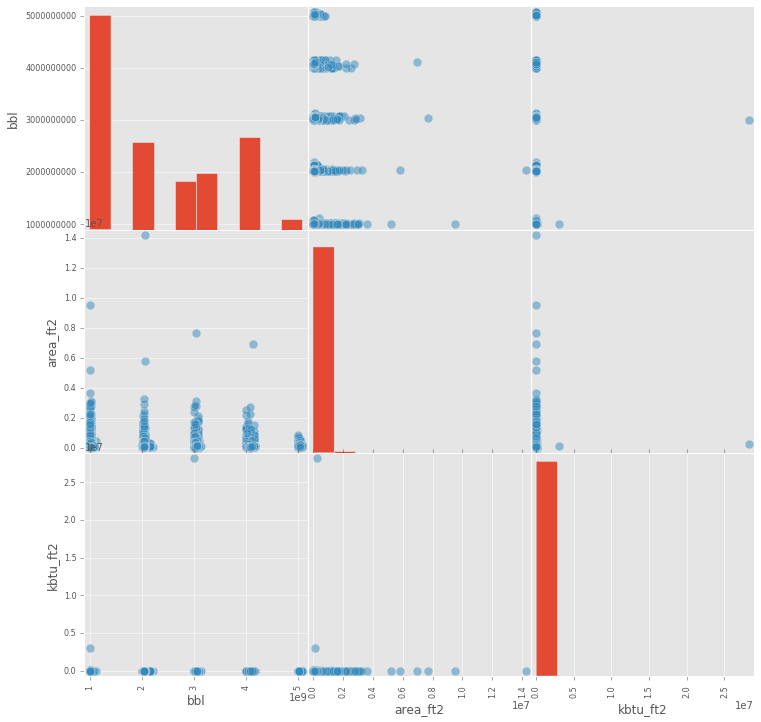

In [11]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, s=300, figsize=(12, 12))
plt.show()

#### Figure 1: scatter matrix of all numerical values in the files.

### Merging the two datasets (by 'BBL')

6582
Index([u'bbl', u'area_ft2', u'kbtu_ft2', u'num_floors', u'units_res',
       u'units_total', u'year_built'],
      dtype='object')


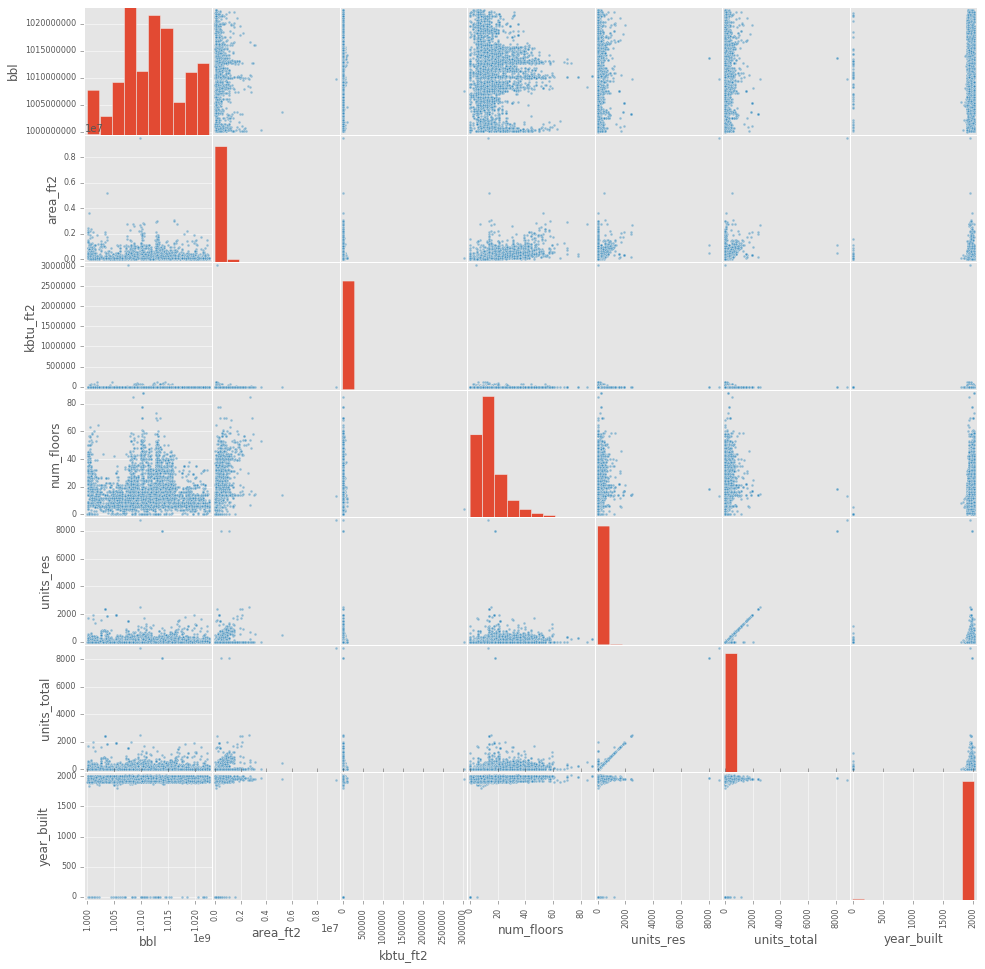

In [12]:
# merge 'nrg' with 'bsize' based on the common 'bbl' key
# we're going to use an inner join, as we only care about datapoints that are supported by BOTH datasets
df = nrg.merge(bsize, how='inner', on='bbl')
print len(df)
print df.columns
scatter_matrix(df, s=30, figsize=(16, 16))
plt.show()

#### Figure 2: Scatter matrix for a merged dataset with energy AND building data

### Visualizing energy consumption vs. units in building

In [13]:
# create a new column with TOTAL energy consumption
df['kbtu_total'] = df['kbtu_ft2'] * df['area_ft2']

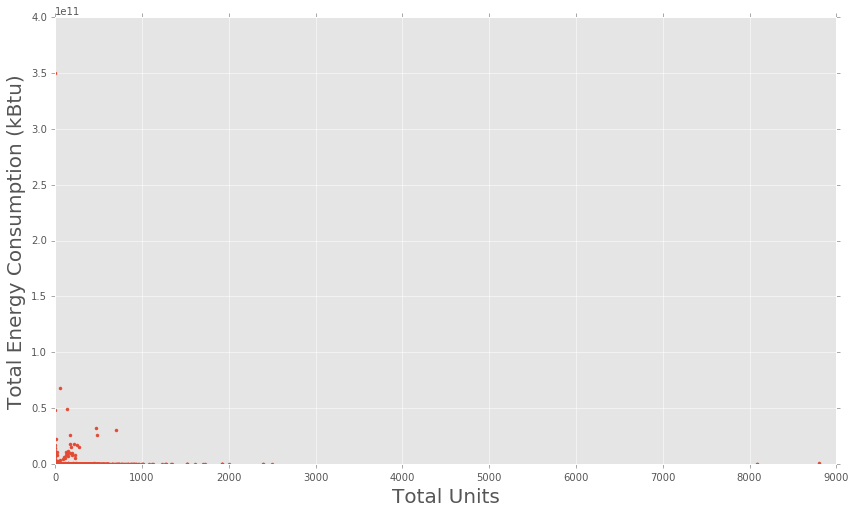

In [14]:
# make an initial atttempt at plotting total energy vs total units, without restricting axes ranges
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.plot(df.units_total, df.kbtu_total, '.')
ax.set_ylabel('Total Energy Consumption (kBtu)', fontsize=20)
ax.set_xlabel('Total Units', fontsize=20)
plt.show()

#### Figure 3: Total energy consumption for Manhattan buildings, based on total number of units

In [15]:
# let's convert total energy from kBtu into TJ (terajoule) for improved readability
df['TJ_total'] = df['kbtu_total'] * 0.0000010550559

In [16]:
# clean up the dataset by cutting "outliers" and unreasonable values
#df = df[(df.TJ_total > 0) & (df.TJ_total <= 200)]
#df = df[(df.units_total > 0) & (df.units_total <= 1000)]

df = df[(df.TJ_total > 1) & (df.TJ_total <= 200)]
df = df[(df.units_total > 10) & (df.units_total <= 1000)]

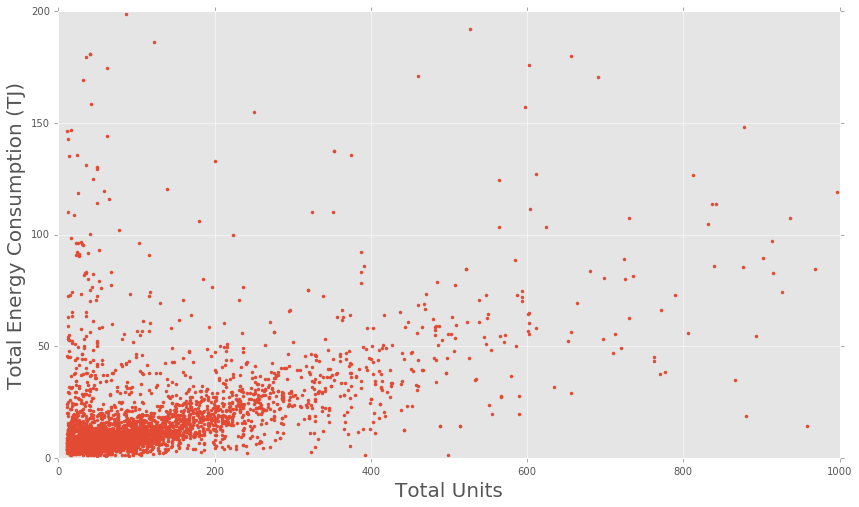

In [17]:
# now refine the axes ranges to make the plot more readable
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.plot(df.units_total, df.TJ_total, '.')
ax.set_ylabel('Total Energy Consumption (TJ)', fontsize=20)
ax.set_xlabel('Total Units', fontsize=20)
ax.set_xlim([0,1000])
ax.set_ylim([0,200])
plt.show()

#### Figure 4: Total energy consumption for Manhattan buildings, based on total number of units (refined x- and y-axes)

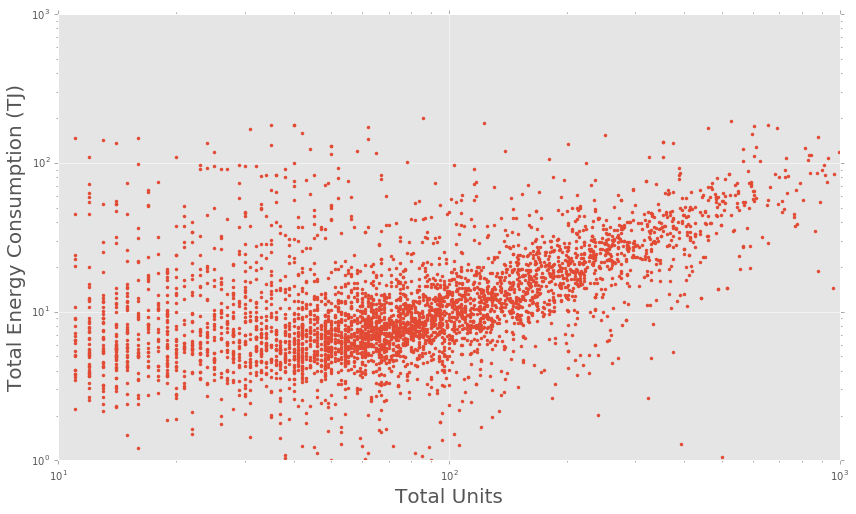

In [18]:
# let's see what the log-scale plot looks like...
# taking the logarythm of both x- and y-axes should deal with the clustering at low numbers for both axes
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.loglog(df.units_total, df.TJ_total, '.')
ax.set_ylabel('Total Energy Consumption (TJ)', fontsize=20)
ax.set_xlabel('Total Units', fontsize=20)
plt.show()

#### Figure 5: Total energy consumption for Manhattan buildings, based on total number of units (log axes)

### Modeling data with regression techniques



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [53]:
# 1) Fit a line to Units vs Energy.

# create two new columns for the log values
df['log_units'] = df.units_total.map(np.log10)
df['log_energy'] = df.TJ_total.map(np.log10)

u_e = sm.ols('log_units ~ log_energy', data = df).fit()
u_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_units   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):          2.24e-259
Time:                        21:11:34   Log-Likelihood:                -1408.1
No. Observations:                4164   AIC:                             2820.
Df Residuals:                    4162   BIC:                             2833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3312      0.016     83.068      0.000         1.300     1.363
log_energy     0.5381      0.015     37.003      0.000         0.510     0.567
==============================================================================
Omnibus:                      348.105   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.184
Skew:                          -0.721   Prob(JB):                    8.73e-100
Kurtosis:                       3.740   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

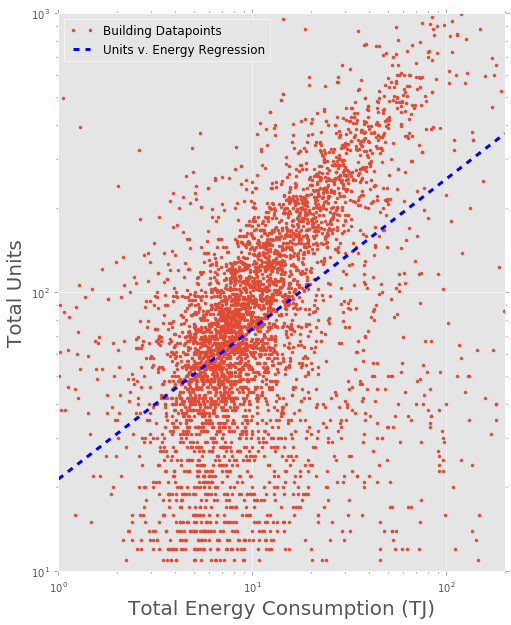

In [64]:
# plot data and regression output for 'Units vs Energy' on log-log axes
xrange = np.linspace(1, 200, 100)

fig, ax = plt.subplots()
fig.set_size_inches(8,10)

ax.loglog(df.TJ_total, df.units_total, '.', label='Building Datapoints')

# transform the log-log regression relationship for plotting REAL VALUES on a logarithmic scale
#y = (10^b) * (x^m)
ax.plot(xrange, (10**u_e.params[0]) * (xrange**u_e.params[1]),
        'b--', linewidth=3, label='Units v. Energy Regression')

ax.set_xlabel('Total Energy Consumption (TJ)', fontsize=20)
ax.set_ylabel('Total Units', fontsize=20)
ax.set_xlim([1,200])
ax.set_ylim([10,1000])
ax.legend(loc=2)

plt.show()

#### Figure 6: Linear regression results for building units as a function of total energy consumption (log-log axes)

In [65]:
# 2) Fit a line to Energy vs Units.

e_u = sm.ols('log_energy ~ log_units', data = df).fit()
e_u.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_energy   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):          2.24e-259
Time:                        21:22:33   Log-Likelihood:                -1081.6
No. Observations:                4164   AIC:                             2167.
Df Residuals:                    4162   BIC:                             2180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1709      0.024      7.116      0.000         0.124     0.218
log_units      0.4600      0.012     37.003      0.000         0.436     0.484
==============================================================================
Omnibus:                      677.795   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1797.757
Skew:                           0.884   Prob(JB):                         0.00
Kurtosis:                       5.690   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

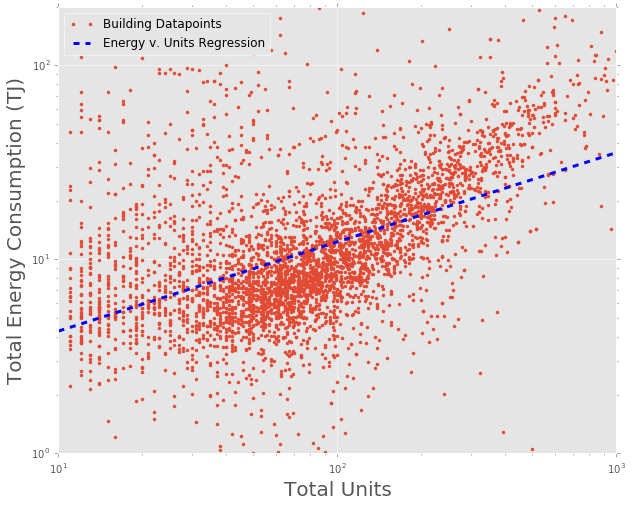

In [66]:
# plot data and regression output for 'Energy vs Units' on log-log axes
xrange = np.linspace(10, 1000, 100)

fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax.loglog(df.units_total, df.TJ_total, '.', label='Building Datapoints')

# transform the log-log regression relationship for plotting REAL VALUES on a logarithmic scale
#y = (10^b) * (x^m)
ax.plot(xrange, (10**e_u.params[0]) * (xrange**e_u.params[1]),
        'b--', linewidth=3, label='Energy v. Units Regression')

ax.set_ylabel('Total Energy Consumption (TJ)', fontsize=20)
ax.set_xlabel('Total Units', fontsize=20)
ax.set_ylim([1,200])
ax.set_xlim([10,1000])
ax.legend(loc=2)

plt.show()

#### Figure 7: Linear regression results for total energy consumption as a function of building units (log-log axes)

chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)

In [74]:
# 3) Evaluate which is better by calculating the chi square.
def chisq(X, Y, model_params):
    """
    This function takes as args an observed set of x and y datapoints, 
    and the parameters to a fitted model. It returns the value of the chisquared statistic 
    that assesses the model's fit to the observed datapoints.
    """
    # compute the "model" Y-values for each value of X
    model = model_params[0] + (model_params[1] * X)
    # the numerator of the chi-squared stat is the squared residual
    num = (model - Y).map(np.square)
    # denominator is (sqrt(observed Y))^2 --> simplifies to Y
    denom = Y
    # sum across all observed datapoints
    return (num / denom).sum()

In [90]:
print 'chi-square for units = F(energy):', chisq(X=df.log_energy, Y=df.log_units, model_params=u_e.params)
print 'chi-square for energy = F(units):', chisq(X=df.log_units, Y=df.log_energy, model_params=e_u.params)

chi-square for units = F(energy): 305.01177295
chi-square for energy = F(units): 1214.90670643


To assess the quality of these chi-square values, we divide by the model's DOF, and expect that for an ideal model, this value will be close to one.

In [97]:
# DOF = observations - num_params - 1
DOF = len(df) - 2 - 1
print 'DOF:', DOF
print 'value for units = F(energy):', 305./DOF
print 'value for energy = F(units):', 1215./DOF

DOF: 4161
value for units = F(energy): 0.0732996875751
value for energy = F(units): 0.291997116078


We see that the fit for energy = F(units) is far better, according to a chi-square test.

In [76]:
# 4) Fit a 2nd degree polynomial to the Units vs Energy.

# I'm going to fit a 2nd degree polynomial to the Energy (Y) vs. Units (X) data, as this
# has a much nicer distribution across the independent variable (Units in this case)
#df['log_units_squared'] = df.log_units.map(np.square)
poly2fit = np.polyfit(df.log_units, df.log_energy, 2)

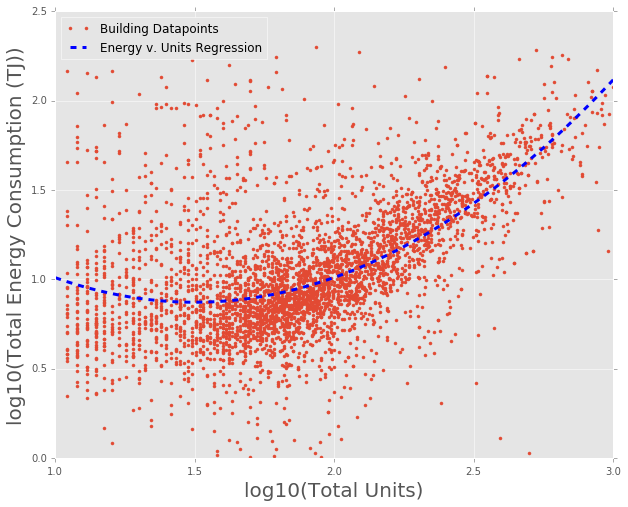

In [82]:
# plot data and 2nd degree polynomial regression output for 'Energy vs Units' on log-log axes
xrange = np.linspace(1, 3, 100)

fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax.plot(df.log_units, df.log_energy, '.', label='Building Datapoints')

# plot 2nd degree polynomial fitted line
ax.plot(xrange, (poly2fit[0]*xrange**2) + (poly2fit[1]*xrange) + poly2fit[2],
        'b--', linewidth=3, label='Energy v. Units Regression')

ax.set_ylabel('log10(Total Energy Consumption (TJ))', fontsize=20)
ax.set_xlabel('log10(Total Units)', fontsize=20)
ax.legend(loc=2)

plt.show()

#### Figure 8: Fitting 2nd order polynomial to total energy consumption as a function of building units (log-log axes)

In [83]:
# 5) Compare the Units vs Energy line fit and the Units vs Energy 2nd degree polynomial fit
#    with the Likelihood ratio test.

# polyfit doesn't give me the log likilihood statistic from our 2nd order fit,
# so I'll use statsmodel expressly for that purpose
stats2fit = sm.ols(formula = 'log_energy ~ I(log_units**2) + log_units', data = df).fit()

LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).

In [88]:
print ("LR : ", -2 * (e_u.llf - stats2fit.llf))

('LR : ', 562.86487827026758)


For DOF of 1 (3 - 2), and alpha=0.05, our critical value for the chi-squared statistic is 3.84. The null hypothesis here is that "model 1" (the simple linear model) is a better model for the data than "model 2" (the 2nd degree polynomial). 

Because our chi-stat is WAY bigger than the critical value, we will REJECT the null, and also conclude that in fact the 2nd degree polynomial is a better fit for our data.

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [ ]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

In [ ]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)